[출처](https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=2)

In [1]:
import pandas as pd
import numpy as np

## 시계열 처리

In [2]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01',
                         '2020-02-01', '2020-02-02',
                         '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [3]:
s['2020-01-01': ]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [4]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [5]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조


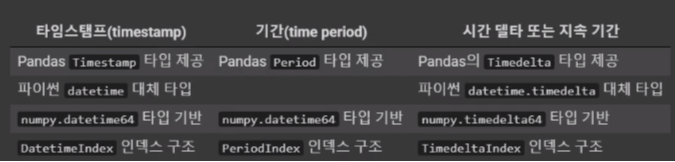

In [6]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), 
                        '2nd of Feb, 2020', '2020-Mar-4', '20200701'])

# 다양한 표현들을 표준으로 변형하게 됨
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [7]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [8]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [9]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [10]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [12]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

Nat : Not a time

In [14]:
idx[2]

NaT

In [15]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [16]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), 
         datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11),
         datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [17]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -0.537034
2020-01-02    0.482971
2020-01-04    0.097477
2020-01-07    0.240460
2020-01-10   -0.409691
2020-01-11    0.432756
2020-01-15   -0.721651
dtype: float64

In [18]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [19]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [20]:
ts[ts.index[2]]

0.09747721879879691

In [21]:
ts['20200104']

0.09747721879879691

In [22]:
ts['1/4/2020']

0.09747721879879691

In [23]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01   -0.573370
2017-10-02    0.616670
2017-10-03   -1.602311
2017-10-04   -0.594537
2017-10-05   -0.504950
                ...   
2020-06-22    0.102069
2020-06-23    1.405925
2020-06-24    0.584856
2020-06-25   -0.179808
2020-06-26   -0.897824
Freq: D, Length: 1000, dtype: float64

인덱싱이 년, 월, 일 로 가능하다.

In [24]:
ts['2020']

2020-01-01    1.011126
2020-01-02   -1.454577
2020-01-03    0.277377
2020-01-04    0.082539
2020-01-05   -0.061555
                ...   
2020-06-22    0.102069
2020-06-23    1.405925
2020-06-24    0.584856
2020-06-25   -0.179808
2020-06-26   -0.897824
Freq: D, Length: 178, dtype: float64

In [25]:
ts['2020-06']

2020-06-01   -1.333698
2020-06-02   -1.504302
2020-06-03    1.202127
2020-06-04    0.786359
2020-06-05   -0.584792
2020-06-06    1.638261
2020-06-07    0.200864
2020-06-08    1.504994
2020-06-09    0.768215
2020-06-10    0.864805
2020-06-11    0.530148
2020-06-12    0.450330
2020-06-13    0.036020
2020-06-14   -0.814444
2020-06-15   -0.422333
2020-06-16   -0.430320
2020-06-17   -0.903538
2020-06-18    0.919689
2020-06-19   -0.846877
2020-06-20   -1.363238
2020-06-21    0.750547
2020-06-22    0.102069
2020-06-23    1.405925
2020-06-24    0.584856
2020-06-25   -0.179808
2020-06-26   -0.897824
Freq: D, dtype: float64

In [26]:
ts[datetime(2020, 6, 20):]

2020-06-20   -1.363238
2020-06-21    0.750547
2020-06-22    0.102069
2020-06-23    1.405925
2020-06-24    0.584856
2020-06-25   -0.179808
2020-06-26   -0.897824
Freq: D, dtype: float64

In [27]:
ts['2020-06-10' : '2020-06-20']

2020-06-10    0.864805
2020-06-11    0.530148
2020-06-12    0.450330
2020-06-13    0.036020
2020-06-14   -0.814444
2020-06-15   -0.422333
2020-06-16   -0.430320
2020-06-17   -0.903538
2020-06-18    0.919689
2020-06-19   -0.846877
2020-06-20   -1.363238
Freq: D, dtype: float64

In [28]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index= pd.date_range('2017-10-01', periods=1000),
                   columns=['A', 'B', 'C', 'D'])
tdf

,A,B,C,D
2017-10-01,-0.649383,0.231323,-0.192686,0.325275
2017-10-02,0.976522,-0.691844,0.292039,0.949174
2017-10-03,-0.072755,1.174154,-0.765127,-0.684275
2017-10-04,-0.432099,0.350205,-0.919523,-1.451082
2017-10-05,-1.545967,-0.377676,1.023043,-0.541873
...,...,...,...,...
2020-06-22,0.291862,-0.548852,-0.555883,0.963543
2020-06-23,0.013143,0.924549,-0.347145,-0.385331
2020-06-24,-0.735036,-0.192499,0.719056,-0.988493
2020-06-25,1.226230,0.523503,-0.230400,-0.327466


In [29]:
tdf['2020']

,A,B,C,D
2020-01-01,2.506254,-0.437677,-0.676255,-0.147975
2020-01-02,-0.227676,-0.516498,2.015226,-0.078720
2020-01-03,1.389756,-0.523955,0.015921,1.660477
2020-01-04,1.875737,0.331540,0.474418,-1.836932
2020-01-05,-0.149092,-0.138022,-1.716696,0.956246
...,...,...,...,...
2020-06-22,0.291862,-0.548852,-0.555883,0.963543
2020-06-23,0.013143,0.924549,-0.347145,-0.385331
2020-06-24,-0.735036,-0.192499,0.719056,-0.988493
2020-06-25,1.226230,0.523503,-0.230400,-0.327466


In [30]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.212282,0.491213,0.646859,-0.765576
2020-06-02,-0.201312,-0.373806,0.689772,0.971482
2020-06-03,1.118529,0.290125,-0.882973,0.840934
2020-06-04,0.004316,0.860840,-1.280403,0.180685
2020-06-05,0.761055,-0.096489,-0.682225,-0.470002
2020-06-06,-0.278445,0.713533,1.113990,-0.129079
2020-06-07,0.256456,0.567898,-0.342182,0.129478
2020-06-08,-1.686025,-0.840892,0.328704,-0.476498
2020-06-09,-0.983386,-0.142021,-0.128052,1.739714
2020-06-10,-0.410204,-0.253361,-1.042407,0.900784


In [31]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,1.034930,-1.015554,0.260051,-0.784503
2020-06-21,-0.664896,-0.908130,0.391691,0.452603
2020-06-22,0.291862,-0.548852,-0.555883,0.963543
2020-06-23,0.013143,0.924549,-0.347145,-0.385331
2020-06-24,-0.735036,-0.192499,0.719056,-0.988493
2020-06-25,1.226230,0.523503,-0.230400,-0.327466
2020-06-26,-0.242921,0.620058,-1.324215,-1.153422


In [32]:
tdf['C']

2017-10-01   -0.192686
2017-10-02    0.292039
2017-10-03   -0.765127
2017-10-04   -0.919523
2017-10-05    1.023043
                ...   
2020-06-22   -0.555883
2020-06-23   -0.347145
2020-06-24    0.719056
2020-06-25   -0.230400
2020-06-26   -1.324215
Freq: D, Name: C, Length: 1000, dtype: float64

In [33]:
ts = pd.Series(np.random.randn(10), 
               index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', 
                                       '2020-01-02', '2020-01-03','2020-01-04',
                                       '2020-01-05', '2020-01-05', '2020-01-06',
                                       '2020-01-07']))
ts

2020-01-01    0.435597
2020-01-01    1.019223
2020-01-02    2.232532
2020-01-02   -0.457022
2020-01-03    0.466643
2020-01-04    0.081729
2020-01-05    2.051851
2020-01-05   -1.227754
2020-01-06   -0.233556
2020-01-07   -0.728948
dtype: float64

In [34]:
ts.index.is_unique

False

In [35]:
ts['2020-01-01']

2020-01-01    0.435597
2020-01-01    1.019223
dtype: float64

In [36]:
# 인덱스가 중복 되므로 평균값으로 이용
ts.groupby(level=0).mean()

2020-01-01    0.727410
2020-01-02    0.887755
2020-01-03    0.466643
2020-01-04    0.081729
2020-01-05    0.412049
2020-01-06   -0.233556
2020-01-07   -0.728948
dtype: float64

In [37]:
pd.date_range('2020-01-01', '2020-07-01')


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [38]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [40]:
# B 는 Business day

pd.date_range('2020-07-01', '2020-07-07', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋


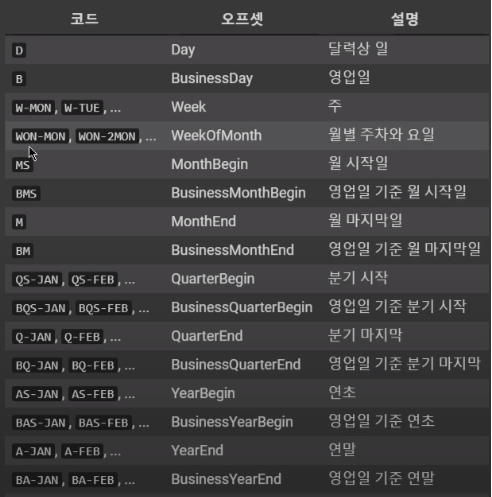

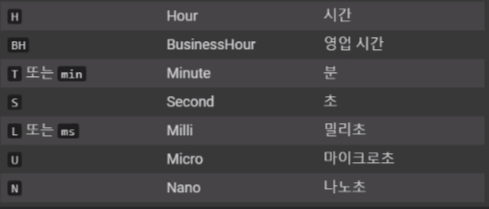

In [41]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [42]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [43]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [44]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [45]:
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [46]:
pd.date_range('2020-01-01', periods=30, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [47]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))

ts

2020-01-01    0.365729
2020-01-02    1.180151
2020-01-03   -1.399141
2020-01-06    1.478367
2020-01-07    2.050556
Freq: B, dtype: float64

In [48]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.365729
2020-01-03    1.180151
2020-01-06   -1.399141
2020-01-07    1.478367
Freq: B, dtype: float64

In [49]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.365729
2020-01-07    1.180151
Freq: B, dtype: float64

In [50]:
ts.shift(-2)

2020-01-01   -1.399141
2020-01-02    1.478367
2020-01-03    2.050556
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [51]:
ts.shift(3, freq='B')

2020-01-06    0.365729
2020-01-07    1.180151
2020-01-08   -1.399141
2020-01-09    1.478367
2020-01-10    2.050556
Freq: B, dtype: float64

In [52]:
ts.shift(2, freq='W')

2020-01-12    0.365729
2020-01-12    1.180151
2020-01-12   -1.399141
2020-01-19    1.478367
2020-01-19    2.050556
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [53]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [54]:
tz = pytz.timezone('Asia/Seoul')

In [55]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
dinx

DatetimeIndex(['2020-01-01 09:00:00', '2020-01-02 09:00:00',
               '2020-01-03 09:00:00', '2020-01-06 09:00:00',
               '2020-01-07 09:00:00', '2020-01-08 09:00:00',
               '2020-01-09 09:00:00'],
              dtype='datetime64[ns]', freq='B')

In [56]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [57]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.397473
2020-01-02 09:00:00+00:00    0.348245
2020-01-03 09:00:00+00:00    1.482372
2020-01-06 09:00:00+00:00    0.261968
2020-01-07 09:00:00+00:00    0.243298
2020-01-08 09:00:00+00:00    1.461137
2020-01-09 09:00:00+00:00   -0.289357
Freq: B, dtype: float64

In [58]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [59]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.397473
2020-01-02 18:00:00+09:00    0.348245
2020-01-03 18:00:00+09:00    1.482372
2020-01-06 18:00:00+09:00    0.261968
2020-01-07 18:00:00+09:00    0.243298
2020-01-08 18:00:00+09:00    1.461137
2020-01-09 18:00:00+09:00   -0.289357
Freq: B, dtype: float64

In [60]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.397473
2020-01-02 09:00:00+09:00    0.348245
2020-01-03 09:00:00+09:00    1.482372
2020-01-06 09:00:00+09:00    0.261968
2020-01-07 09:00:00+09:00    0.243298
2020-01-08 09:00:00+09:00    1.461137
2020-01-09 09:00:00+09:00   -0.289357
dtype: float64

In [61]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.397473
2020-01-02 00:00:00+00:00    0.348245
2020-01-03 00:00:00+00:00    1.482372
2020-01-06 00:00:00+00:00    0.261968
2020-01-07 00:00:00+00:00    0.243298
2020-01-08 00:00:00+00:00    1.461137
2020-01-09 00:00:00+00:00   -0.289357
dtype: float64

In [62]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.397473
2020-01-02 01:00:00+01:00    0.348245
2020-01-03 01:00:00+01:00    1.482372
2020-01-06 01:00:00+01:00    0.261968
2020-01-07 01:00:00+01:00    0.243298
2020-01-08 01:00:00+01:00    1.461137
2020-01-09 01:00:00+01:00   -0.289357
dtype: float64

In [63]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [64]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [65]:
stamp_utc.value

1577880000000000000

In [66]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [67]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [68]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [69]:
stamp_utc.value

1577880000000000000

In [70]:
stamp_ny.value

1577898000000000000

In [71]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [72]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [73]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [74]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [75]:
ts_utc

2020-01-01 09:00:00+00:00    0.397473
2020-01-02 09:00:00+00:00    0.348245
2020-01-03 09:00:00+00:00    1.482372
2020-01-06 09:00:00+00:00    0.261968
2020-01-07 09:00:00+00:00    0.243298
2020-01-08 09:00:00+00:00    1.461137
2020-01-09 09:00:00+00:00   -0.289357
Freq: B, dtype: float64

In [76]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [77]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [78]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [79]:
p + 2

Period('2022', 'A-JAN')

In [80]:
p - 3

Period('2017', 'A-JAN')

In [81]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [82]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [83]:
pd.Series(np.random.randn(6), index=pr)

2020-01   -0.978515
2020-02    0.198121
2020-03    0.851022
2020-04    0.338579
2020-05   -0.044519
2020-06   -1.491903
Freq: M, dtype: float64

In [84]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [85]:
p = pd.Period('2020', freq='A-FEB')
p 

Period('2020', 'A-FEB')

In [86]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [87]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [88]:
p = pd.Period('2020', freq='A-OCT')
p


Period('2020', 'A-OCT')

In [89]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [90]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [91]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    0.160174
2011   -1.252005
2012   -0.007287
2013   -0.784628
2014   -1.680225
2015    0.790486
2016    0.239386
2017   -0.301303
2018   -1.459687
2019    0.841451
2020   -0.299723
Freq: A-JAN, dtype: float64

In [92]:
ts.asfreq('M', how='start')

2009-02    0.160174
2010-02   -1.252005
2011-02   -0.007287
2012-02   -0.784628
2013-02   -1.680225
2014-02    0.790486
2015-02    0.239386
2016-02   -0.301303
2017-02   -1.459687
2018-02    0.841451
2019-02   -0.299723
Freq: M, dtype: float64

In [93]:
ts.asfreq('B', how='end')

2010-01-29    0.160174
2011-01-31   -1.252005
2012-01-31   -0.007287
2013-01-31   -0.784628
2014-01-31   -1.680225
2015-01-30    0.790486
2016-01-29    0.239386
2017-01-31   -0.301303
2018-01-31   -1.459687
2019-01-31    0.841451
2020-01-31   -0.299723
Freq: B, dtype: float64

In [94]:
p = pd.Period('2020Q2', freq='Q-JAN')
p 

Period('2020Q2', 'Q-JAN')

In [95]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [96]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [97]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [98]:
pr = pd.date_range('2020-01-01',periods=5, freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2020-01-31    0
2020-04-30    1
2020-07-31    2
2020-10-31    3
2021-01-31    4
Freq: Q-JAN, dtype: int32

In [99]:
ts.to_period()

2020Q4    0
2021Q1    1
2021Q2    2
2021Q3    3
2021Q4    4
Freq: Q-JAN, dtype: int32

In [100]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -1.336356
2020-01-02    1.672806
2020-01-03    0.118858
2020-01-04    0.505550
2020-01-05   -0.585219
Freq: D, dtype: float64

In [101]:
p = ts.to_period('M')
p

2020-01   -1.336356
2020-01    1.672806
2020-01    0.118858
2020-01    0.505550
2020-01   -0.585219
Freq: M, dtype: float64

In [102]:
p.to_timestamp(how='start')

2020-01-01   -1.336356
2020-01-01    1.672806
2020-01-01    0.118858
2020-01-01    0.505550
2020-01-01   -0.585219
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

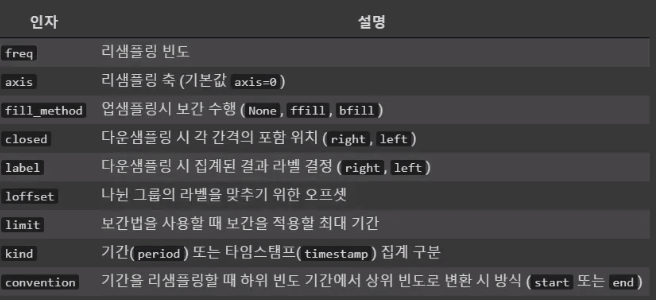

In [106]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01    0.481229
2020-01-02    0.533199
2020-01-03   -0.742972
2020-01-04   -0.170081
2020-01-05   -1.086815
                ...   
2020-07-14    0.092595
2020-07-15    0.962388
2020-07-16    0.743229
2020-07-17    0.975016
2020-07-18   -0.412850
Freq: D, Length: 200, dtype: float64

In [108]:
ts.resample('M').mean()

2020-01-31   -0.271239
2020-02-29    0.080745
2020-03-31   -0.058978
2020-04-30   -0.094802
2020-05-31    0.112861
2020-06-30    0.036541
2020-07-31    0.252850
Freq: M, dtype: float64

In [109]:
ts.resample('M', kind='period').mean()

2020-01   -0.271239
2020-02    0.080745
2020-03   -0.058978
2020-04   -0.094802
2020-05    0.112861
2020-06    0.036541
2020-07    0.252850
Freq: M, dtype: float64

In [111]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [112]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [113]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [114]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [115]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

<ipython-input-115-f09f275c4eda>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed='right', label='right', loffset='-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [116]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [118]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  index = pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,-0.091199,-0.244230,-1.305612,0.080049
2019-11-30,0.168072,-0.875080,-0.582765,0.338755
2019-12-31,-0.154970,-0.570810,-0.718302,-1.118574
2020-01-31,1.200819,-0.040243,-0.561713,0.810923
2020-02-29,2.347192,-0.903984,-1.321449,0.921711
2020-03-31,-0.683409,0.888294,-0.691690,-1.377839
2020-04-30,-1.304013,0.478711,3.130445,0.613855
2020-05-31,0.923353,0.129289,-0.939741,-1.777774
2020-06-30,0.735372,0.361794,-0.707894,-0.600153
2020-07-31,-0.068896,0.381267,1.264431,0.235820


In [119]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.15497,-0.57081,-0.718302,-1.118574
2020-12-31,NaN,NaN,NaN,NaN


In [120]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [121]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [123]:
df.resample('H').ffill() # 앞에 값으로 채우기

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 01:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 02:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 03:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 04:00:00,-0.091199,-0.244230,-1.305612,0.080049
...,...,...,...,...
2020-07-30 20:00:00,0.735372,0.361794,-0.707894,-0.600153
2020-07-30 21:00:00,0.735372,0.361794,-0.707894,-0.600153
2020-07-30 22:00:00,0.735372,0.361794,-0.707894,-0.600153
2020-07-30 23:00:00,0.735372,0.361794,-0.707894,-0.600153


In [124]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 01:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 02:00:00,-0.091199,-0.244230,-1.305612,0.080049
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [125]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.026032,-0.563373,-0.868893,-0.233257
2020-03-31,0.954867,-0.018644,-0.858284,0.118265
2020-06-30,0.118237,0.323265,0.494270,-0.588024
2020-09-30,-0.068896,0.381267,1.264431,0.235820


In [126]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.026032,-0.563373,-0.868893,-0.233257
2020-12-31,0.450060,0.185018,0.024627,-0.167637


### 무빙 윈도우(Moving Window)

In [127]:
df = pd.DataFrame(np.random.randn(300, 4), 
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,1.023353,-0.439477,-0.423858,-0.296762
2020-01-02,0.500321,2.017486,1.011854,-0.600296
2020-01-03,0.668293,-1.568114,0.064951,-0.114663
2020-01-04,-0.912160,1.166851,0.115299,-0.116383
2020-01-05,2.856627,0.447666,-0.730727,-2.178130
...,...,...,...,...
2020-10-22,-0.554507,-1.383742,-0.168415,1.230608
2020-10-23,-1.539827,-0.763156,-0.851817,0.307430
2020-10-24,1.269388,0.070903,0.251390,0.712966
2020-10-25,-0.390320,0.504606,-0.904520,0.562973


<AxesSubplot:>

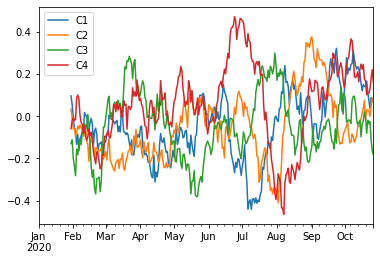

In [130]:
df.rolling(30).mean().plot()

<AxesSubplot:>

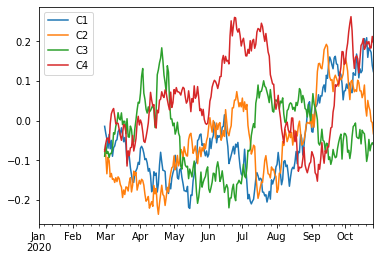

In [131]:
df.rolling(60).mean().plot()

<AxesSubplot:>

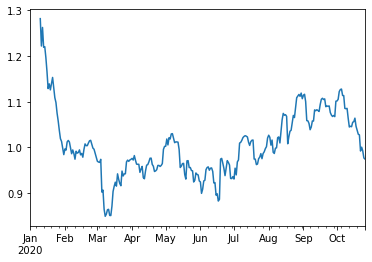

In [133]:
df.C1.rolling(60, min_periods=10).std().plot()

<AxesSubplot:>

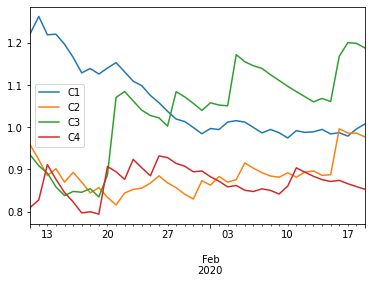

In [134]:
df.rolling(60, min_periods=10).std()[10:50].plot()

<AxesSubplot:>

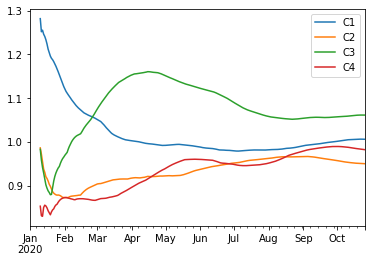

In [135]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

<AxesSubplot:>

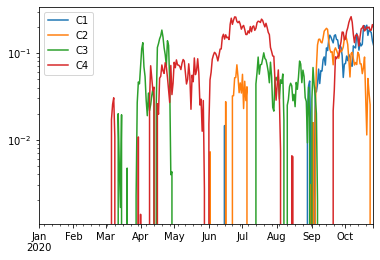

In [136]:
df.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

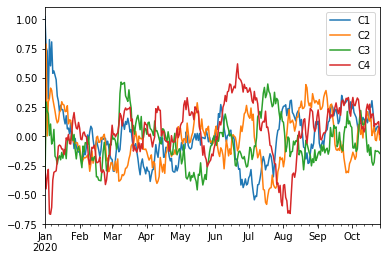

In [137]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

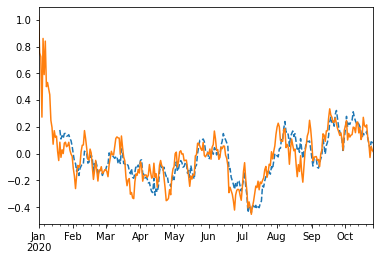

In [138]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:>

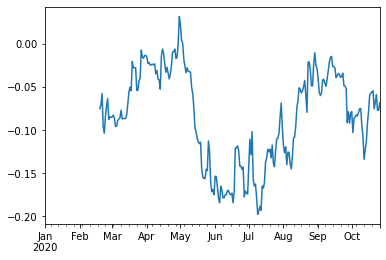

In [140]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot:>

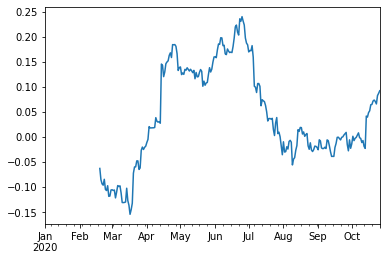

In [142]:
df.C1.rolling(100, min_periods=50).corr(df.C4).plot()

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly